# Memo

## 1. Two potential problem considering different energy state
We considered only the linear combination of the ground state. We will try considering the state with higher energy.


In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [132]:
# Hamiltonian of sigle potential
def make_H1dp(N,xmax,xmin,V):
    mat_H = np.zeros((N, N))
    dx = (xmax-xmin)/N   
    for n in range(N):
        for i in (-1, 0, 1):
            j = n + i
            # periodic boundary consition. 
            if j >=N:
                j = 0
            if j <0:
                j = N -1
            v = 0.0 
            if i == 0:              
                v = (2/dx**2 + V[n])
            elif i == 1:
                v = -1/dx**2
            elif i == -1:
                v = -1/dx**2
            if 0 <= j and j < N:
                mat_H[n,j] = v
                
    return mat_H

In [133]:
# Give a potnential at x0
def potential_shift(x, x0, V0):
    V =  V0*np.exp(-(x-x0)**2)
    return V

In [134]:
def eigen(x_range, V0):
    N = 1000
    xmax = x_range
    xmin = -x_range
    xvec = np.linspace(xmin, xmax, N)
    # Eigenvalues for potential 1
    pot_min = (xmax-xmin)/2
    x0 = xmin+pot_min/2
    V1 = potential_shift(xvec, x0, V0)
    mat_H1 = make_H1dp(N,xmax,xmin, V1) 
    energy1,mat_v1 = np.linalg.eig(mat_H1)
    ind1 = np.argsort(energy1)
    energy1 = energy1[ind1]
    mat_v1 = mat_v1.T[ind1]

    # Eigenvalues for potential 2
    x0 = xmin+pot_min*3/2
    V2 = potential_shift(xvec, x0, V0)
    mat_H2 = make_H1dp(N,xmax,xmin, V2)
    energy2,mat_v2 = np.linalg.eig(mat_H2)
    ind2 = np.argsort(energy2)
    energy2 = energy2[ind2]
    mat_v2 = mat_v2.T[ind2]

    return energy1, mat_v1, energy2, mat_v2, V1, V2

In [135]:
def calc_Htb(cutoff, E1, E2, v1, v2, V1, V2):
    mat_Htb = np.zeros((2*cutoff,2*cutoff))
    N = len(v1[0])
    # 
    for i in range(cutoff):
        for j in range(cutoff):
            mat_Htb[i][j] = E1[j]*np.sum(v1[i]*v1[j]) + np.sum(v1[i]*V2*v1[j])
        for j in range(cutoff):
            mat_Htb[i][j + cutoff] = E2[j]*np.sum(v1[i]*v2[j]) + np.sum(v1[i]*V1*v2[j])
    # 
    for i in range(cutoff):
        for j in range(cutoff):
            mat_Htb[i+ cutoff][j] = E1[j]*np.sum(v2[i]*v1[j]) + np.sum(v2[i]*V2*v1[j])
        for j in range(cutoff):
            mat_Htb[i + cutoff][j + cutoff] = E2[j]*np.sum(v2[i]*v2[j]) + np.sum(v2[i]*V1*v2[j])
    return mat_Htb

[-6.27991464e+00 -6.26213060e+00 -1.05349272e+00 -2.71203250e-01
  6.79020189e-09  7.18929517e-07  2.58813396e-06  3.03830356e-06
  1.02125264e-05  2.47504819e-04  2.24488926e-02  2.98825959e-02
  5.05013119e-01  9.72365456e-01  1.25794999e+00  4.08300642e+00
  4.10158137e+00  8.98397324e+00  9.47130463e+00  1.57442468e+01]
[-0.37114665  0.15889057 -0.32713327 -0.2323699   0.33857964 -0.1254699
 -0.20380656  0.03345829 -0.04728162  0.02685169  0.37114665 -0.15889056
 -0.32713327  0.23236991 -0.33857964  0.1254699  -0.20380656 -0.03345829
 -0.04728162  0.02685169]


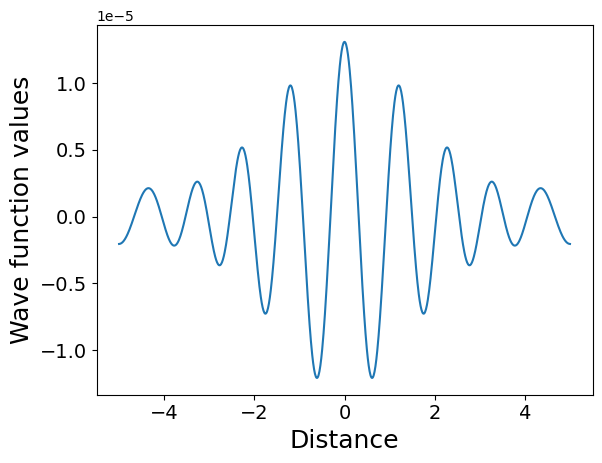

In [237]:
x_range = 5
V0 = -5
cutoff = 10 # considering 5 orbitals from the ground state
energy1, mat_v1, energy2, mat_v2, V1, V2 = eigen(x_range, V0)
mat_Htb = calc_Htb(cutoff, energy1, energy2, mat_v1, mat_v2, V1, V2)


# Diagonalization
ε,c1 = np.linalg.eig(mat_Htb)
ind = np.argsort(ε)
ε = ε[ind]
c1 = c1.T[ind]
val = 5
print(ε)
print(c1[val])
wf = np.zeros(len(mat_v1[0]))
for i in range(cutoff):
    wf += c1[val][i]*mat_v1[i]
    wf += c1[val][i+cutoff]*mat_v2[i]
    
xvec = np.linspace(-x_range, x_range, 1000)
plt.plot(xvec, wf)
plt.xlabel("Distance", fontsize = 18)
plt.ylabel("Wave function values", fontsize = 18)
plt.tick_params(labelsize=14)
plt.show()

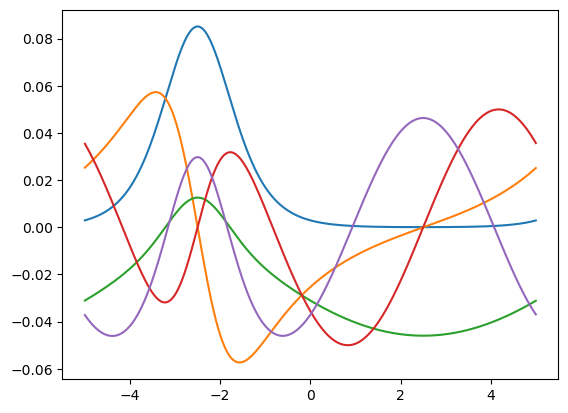

In [212]:
# plotting 0-5 states
plt.plot(xvec, mat_v1[0], label = "Ground")
plt.plot(xvec, mat_v1[1], label = "Firstexcited")
plt.plot(xvec, mat_v1[2], label = "second")
plt.plot(xvec, mat_v1[3], label = "third")
plt.plot(xvec, mat_v1[4], label = "Fouth")